In [67]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans



# 1 - Loading The Dataset

In [68]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\cars.csv")

df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [70]:
df[" weightlbs"]

0      4209
1      1925
2      3449
3      3761
4      2051
       ... 
256    3840
257    1800
258    2835
259    3288
260    3353
Name:  weightlbs, Length: 261, dtype: object

###### Since some column names start with a white space character, i will remove it first

In [71]:
for x in list(df.columns):
    df[x.replace(" ","")]=df[x]
    
    
    
                 
                 
    

In [72]:
df=df.drop([' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],axis=1,inplace=False)

In [73]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [74]:
df['weightlbs']

0      4209
1      1925
2      3449
3      3761
4      2051
       ... 
256    3840
257    1800
258    2835
259    3288
260    3353
Name: weightlbs, Length: 261, dtype: object

###### now lets check for any null values 


In [75]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

###### There are no null values in the dataset,so we can proceed

# 2 - Feature Engineering

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [77]:
categories=[]
for x in df.columns:
    if df[x].dtypes == 'O':
        categories.append(x)
        
print(categories)        
    

['cubicinches', 'weightlbs', 'brand']


In [84]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


<p> i will only consider the numerical values and drop the categorical features</p>

In [85]:
df=df.drop(categories,axis=1)

df.head()


,mpg,cylinders,hp,time-to-60,year
0,14.0,8,165,12,1972
1,31.9,4,71,14,1980
2,17.0,8,140,11,1971
3,15.0,8,150,10,1971
4,30.5,4,63,17,1978


# 3- Model Selection 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


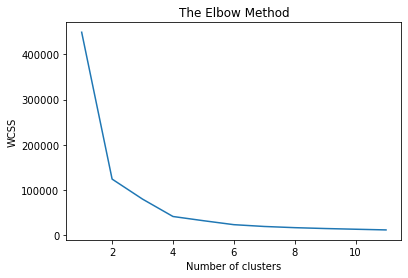

In [88]:
wcss = []
for i in range(1,12):
    kmean = KMeans(n_clusters=i,init='k-means++',random_state=100)
    kmean.fit(df)
    wcss.append(kmean.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<p> from the elbow method we can observe that the best k value seems to be 4, so we will choose that for our model </p>

In [97]:
kmean2=KMeans(n_clusters=4,random_state=100)

y_pred=kmean2.fit_predict(df)

In [98]:
kmean2.inertia_

41250.66384323294